In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
df.shape

(730, 16)

Dataset has 730 rows and 16 columns

Except 'dteday' column, other columns are of datatype float or integer.

It is clearly visible in the dataset that some fields are categorical but in interger/float type.

### DATA UNDERSTANDING AND CLEANING

In [15]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The output shows that there are no missing values in the dataset, which simplifies the data cleaning step.


In [18]:
df_dupl = df.copy()

In [20]:
df_dupl.drop_duplicates(inplace=True, subset=None)

In [22]:
df_dupl.shape

(730, 16)

The shape remains the same as in original dataframe after removing duplicates. 

#### Hence, there is zero duplicate values in the dataset

### TRANSFORM CATEGORICAL VARIABLE


According to the dataset characteristics:

"season" and "weathersit" should be converted to descriptive labels as they represent categories without an inherent numeric order.
"yr", "mnth", "holiday", "weekday", and "workingday" will remain as categorical but can be used directly as numeric.


In [27]:
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear', 
    2: 'Mist_Cloudy', 
    3: 'Light_Snow_Rain', 
    4: 'Heavy_Snow_Rain'
})

In [29]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,0,6,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,0,0,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [31]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [33]:
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [35]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [37]:
import calendar

df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [39]:
df['weekday'] = df['weekday'].apply(lambda x: calendar.day_abbr[x])
df['weekday'].unique()

array(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [43]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sun,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Mon,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### UNIVARIATE ANALYSIS

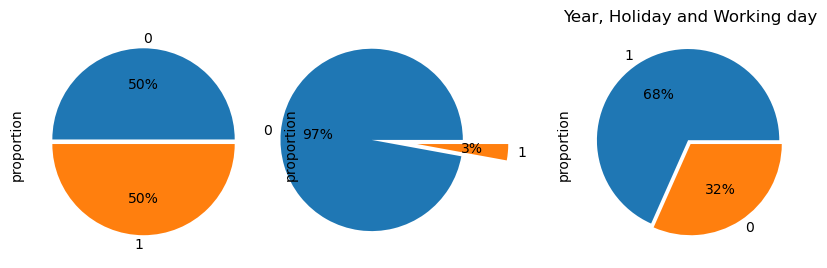

In [46]:
plt.figure(figsize=[10,15])
plt.subplot(131)
df.yr.value_counts(normalize=True).plot.pie(explode=(0.05, 0), autopct="%1.0f%%")
plt.subplot(132)
df.holiday.value_counts(normalize=True).plot.pie(explode=(0.5, 0), autopct="%1.0f%%")
plt.subplot(133)
df.workingday.value_counts(normalize=True).plot.pie(explode=(0.05, 0), autopct="%1.0f%%")
plt.title('Year, Holiday and Working day')
plt.show()

Observing these three Pie charts, we can conclude that:

1. Year is expected to be 50%-50% daily records of bike usage
2. Holidays is significanly less compared to Non-holidays, hence bike usage is more in Non-holidays
3. Working days are higher than Non-working days, hence bike usage is more in Working days

### BIVARIATE ANALYSIS

Categroical Variables are
1. WeatherSit
2. Season
3. Weekday
4. Month

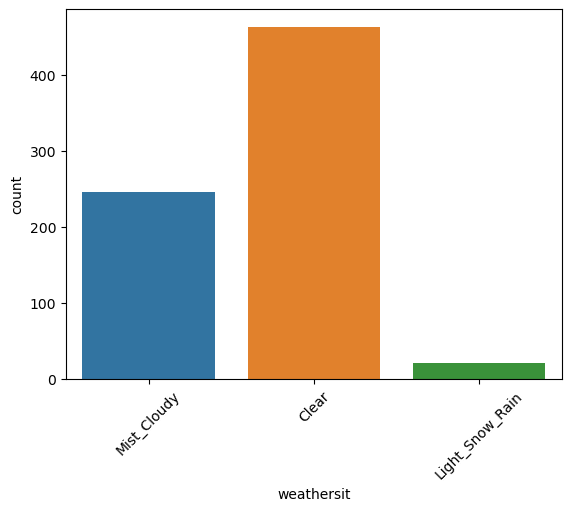

In [50]:
sns.countplot(data=df, x='weathersit')
plt.xticks(rotation=45)
plt.show()

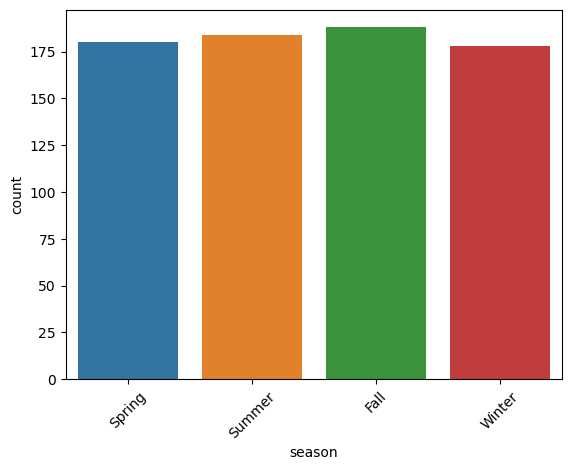

In [52]:
sns.countplot(data=df, x='season')
plt.xticks(rotation=45)
plt.show()

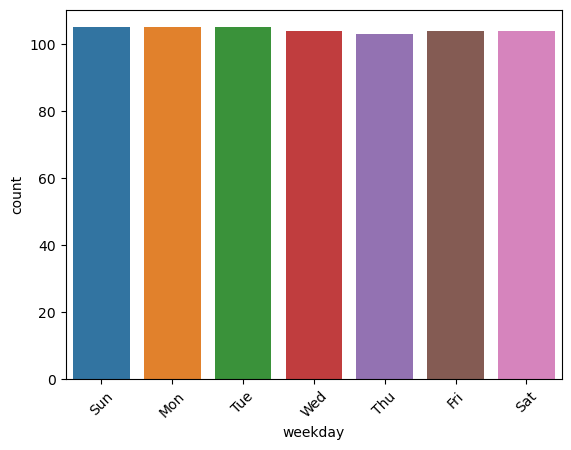

In [54]:
sns.countplot(data=df, x='weekday')
plt.xticks(rotation=45)
plt.show()

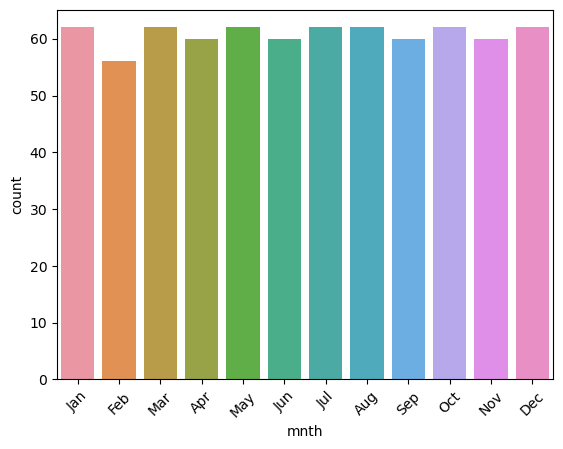

In [56]:
sns.countplot(data=df, x='mnth')
plt.xticks(rotation=45)
plt.show()

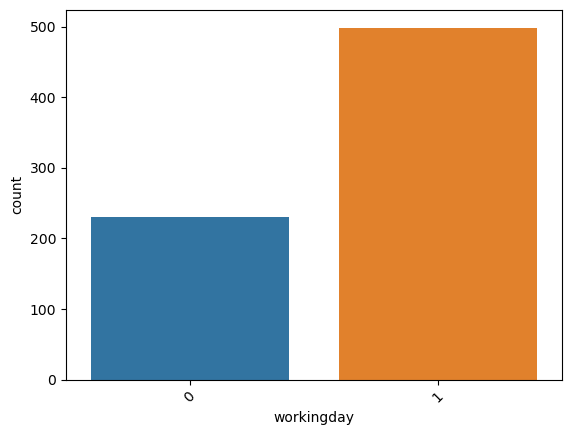

In [58]:
sns.countplot(data=df, x='workingday')
plt.xticks(rotation=45)
plt.show()

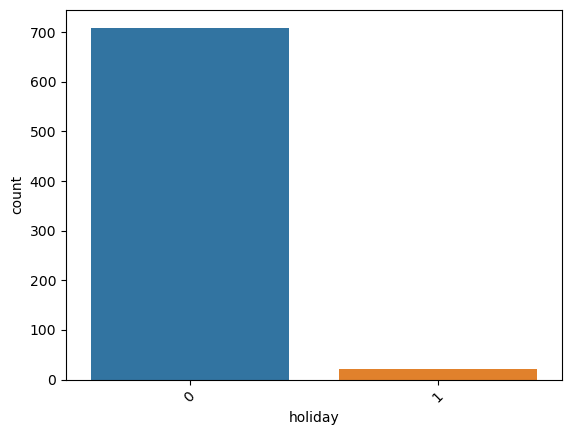

In [60]:
sns.countplot(data=df, x='holiday')
plt.xticks(rotation=45)
plt.show()

Observing the plots, we can conclude that:

1. There is an increase in number of bike usage from year 2018 to 2019
2. There are more users during Holidays than Non-holidays
3. There is a sublte discrepancy between BoomBike users on working day and non-working day

### VISUALIZING CATEGORICAL VARIABLES AGAINST 'CNT'

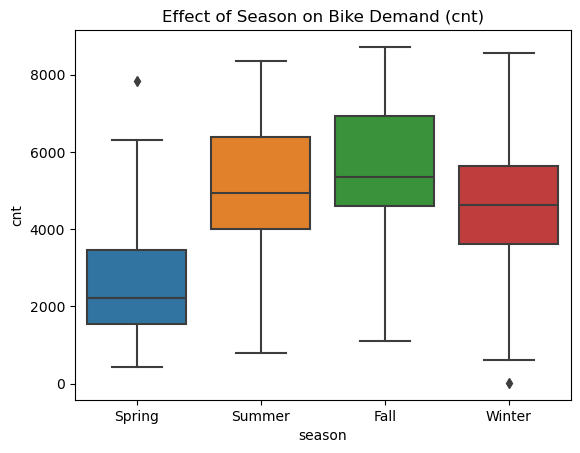

In [64]:
plt.title('Effect of Season on Bike Demand (cnt)')
plt.xlabel('Season')
plt.ylabel('Bike Demand (cnt)')
sns.boxplot(x='season', y='cnt', data=df)
plt.show()

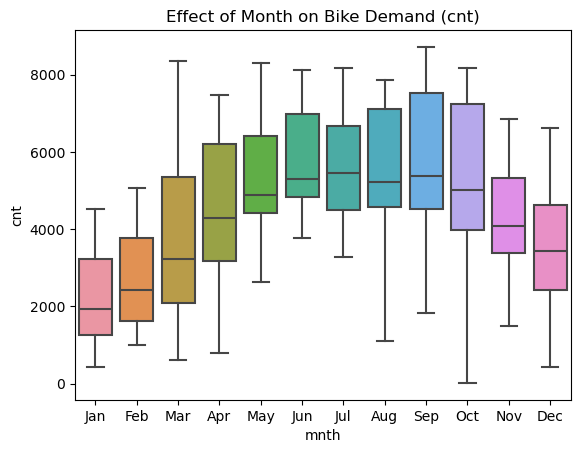

In [66]:
plt.title('Effect of Month on Bike Demand (cnt)')
plt.xlabel('Month')
plt.ylabel('Bike Demand (cnt)')
sns.boxplot(x='mnth', y='cnt', data=df)
plt.show()

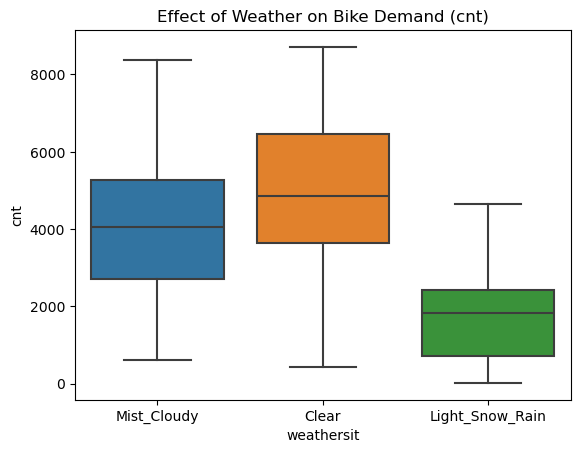

In [68]:
plt.title('Effect of Weather on Bike Demand (cnt)')
plt.xlabel('Weather')
plt.ylabel('Bike Demand (cnt)')
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

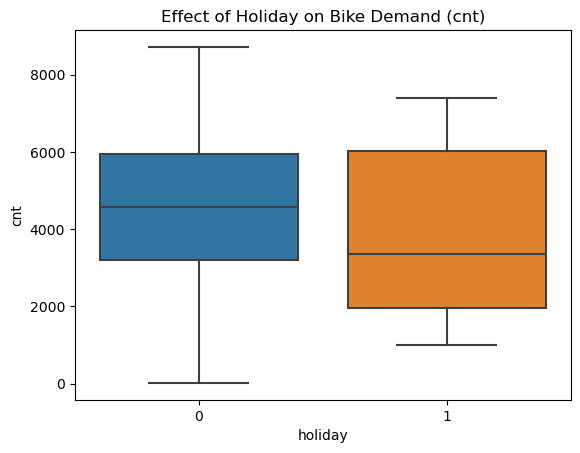

In [70]:
plt.title('Effect of Holiday on Bike Demand (cnt)')
plt.xlabel('Holiday')
plt.ylabel('Bike Demand (cnt)')
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

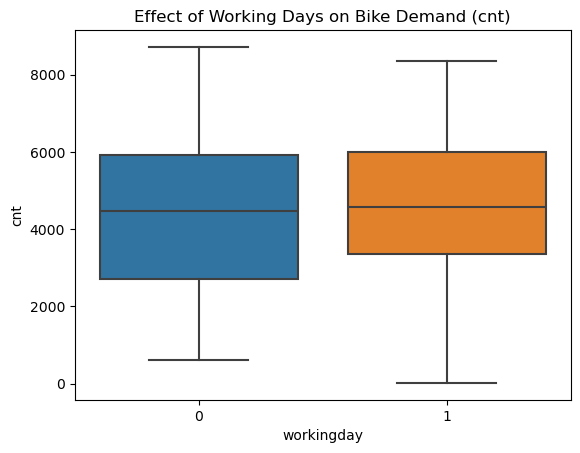

In [72]:
plt.title('Effect of Working Days on Bike Demand (cnt)')
sns.boxplot(x='workingday', y='cnt', data=df)
plt.show()

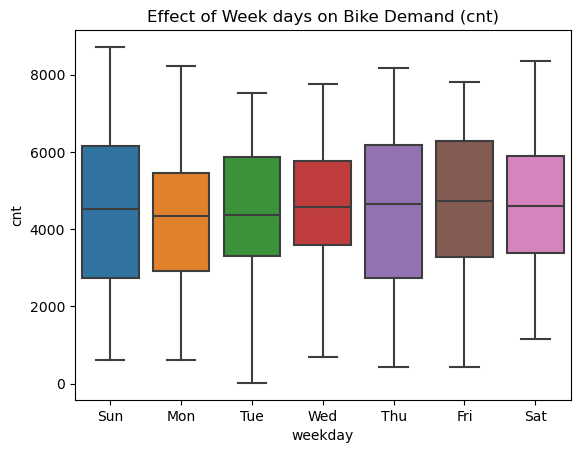

In [74]:
plt.title('Effect of Week days on Bike Demand (cnt)')
sns.boxplot(x='weekday', y='cnt', data=df)
plt.show()

## CORRELATION MATRIX

In [77]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [79]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

ValueError: could not convert string to float: 'Spring'

### CREATING DUMMY VARIABLES

Creating dummy variables for categorical variables: 'mnth', 'season' and 'weathersit'

In [81]:
df = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  weathersit_Light_Snow_Rain  730 non-null    bool   
 12  weathersit_Mist_Cloudy      730 non-null    bool   
 13  mnth_Aug                    730 non

In [85]:
df.shape

(730, 30)

### SPLITTING TRAINING AND TESTING DATA


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=333)

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    bool   
 9   season_Summer               510 non-null    bool   
 10  season_Winter               510 non-null    bool   
 11  weathersit_Light_Snow_Rain  510 non-null    bool   
 12  weathersit_Mist_Cloudy      510 non-null    bool   
 13  mnth_Aug                    510 non-nu

In [94]:
df_train.shape

(510, 30)

## RESCALING THE FEATURES

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()

In [101]:
X_train = df_train.drop(columns=['cnt'])
y_train = df_train['cnt']

In [126]:
X_test = df_test.drop(columns=['cnt'])
y_test = df_test['cnt']

In [128]:
y_train

483    6304
650    7109
212    4266
714    3786
8       822
       ... 
467    6398
444    6230
46     2115
374    3598
366    1951
Name: cnt, Length: 510, dtype: int64

In [130]:
X_train_scaled = scaler.fit_transform(X_train)

In [132]:
X_test_scaled = scaler.transform(X_test)

In [135]:
from sklearn.linear_model import LinearRegression

In [137]:
linearModel = LinearRegression()
linearModel.fit(X_train_scaled, y_train)

LinearRegression()

In [139]:
y_pred_scaled = linearModel.predict(X_test_scaled)

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [145]:
test_r2_scaled = r2_score(y_test, y_pred_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
test_mae = mean_absolute_error(y_test, y_pred_scaled)

In [149]:
test_r2_scaled

0.8422677846817628

In [151]:
test_rmse

757.5584902613482

In [153]:
test_mae

561.3787524893714

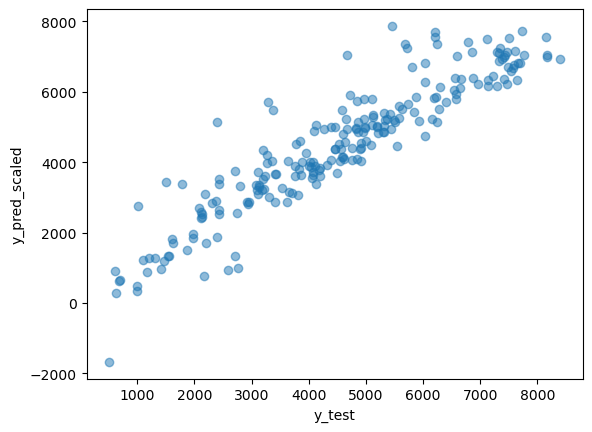

In [157]:
plt.scatter(y_test, y_pred_scaled, alpha=.5)
plt.xlabel('y_test')
plt.ylabel('y_pred_scaled')
plt.show()

## LINEAR REGRESSION SUBJECTIVE QUESTIONS (Q1, Q3, Q5)

In [160]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [162]:
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

### QUESTION 3

Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? 


D:\Users\SHARAVANAKUMAR_B_S\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\SHARAVANAKUMAR_B_S\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\SHARAVANAKUMAR_B_S\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\SHARAVANAKUMAR_B_S\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

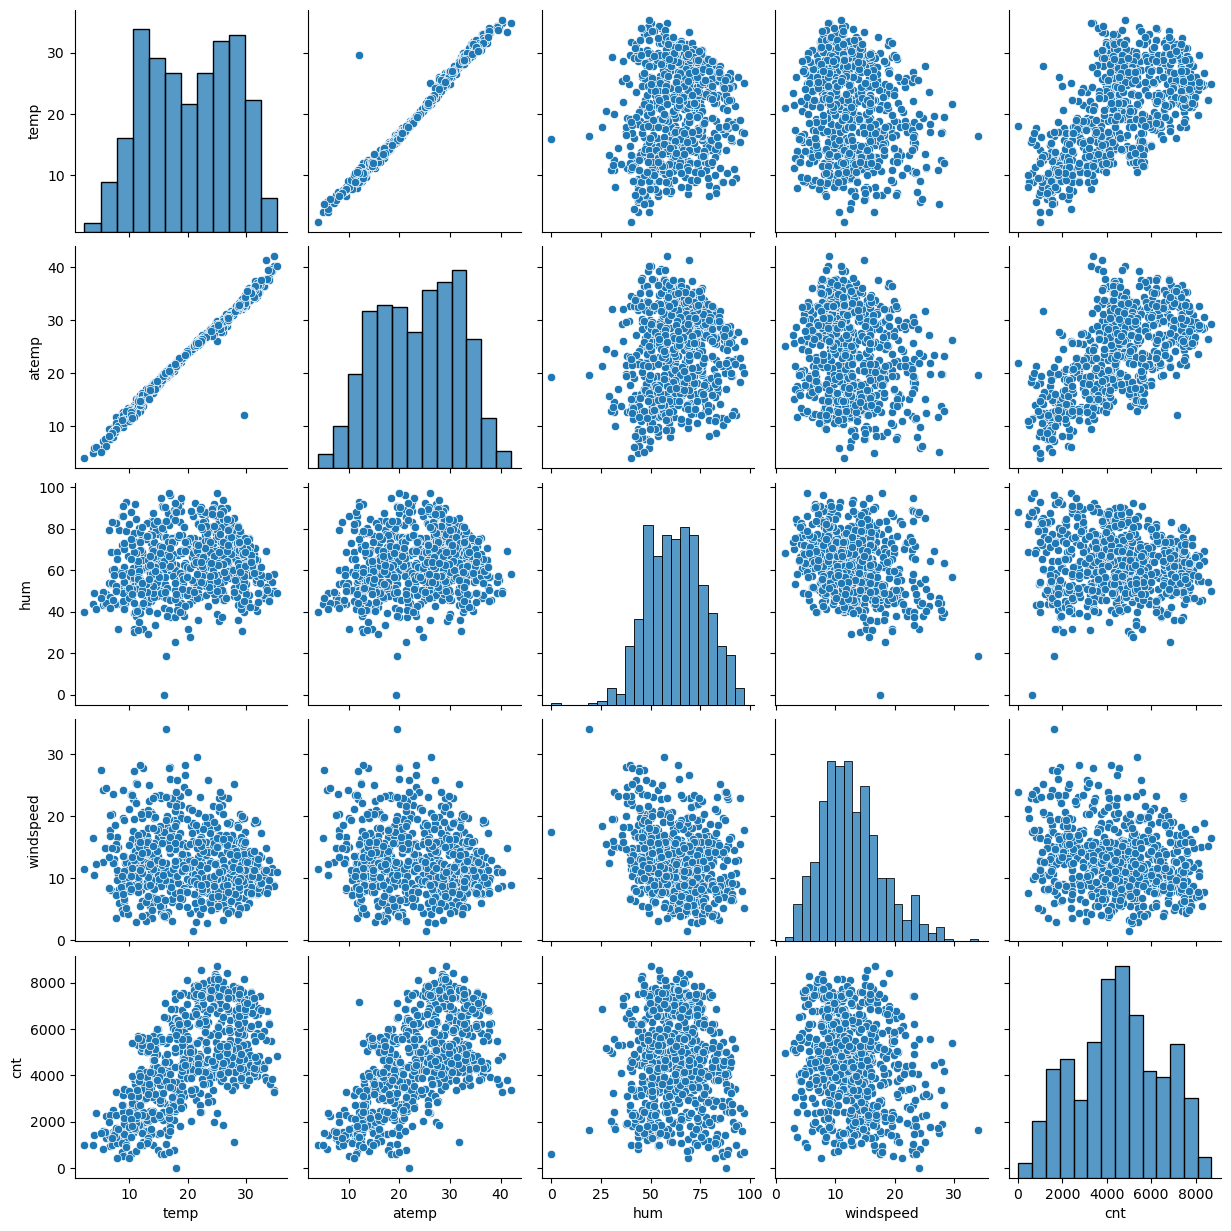

In [165]:
sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

In [166]:
correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
correlation_matrix

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


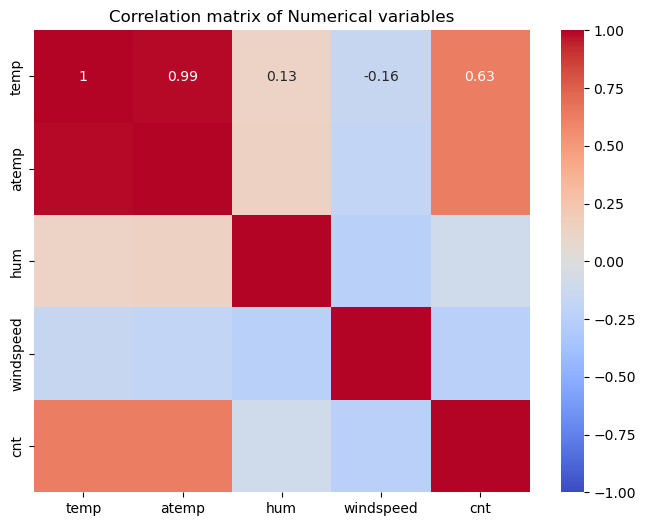

In [167]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of Numerical variables')
plt.show()

### QUESTION 4: RESIDUAL ANALYSIS

How did you validate the assumptions of Linear Regression after building the model on the training set? 

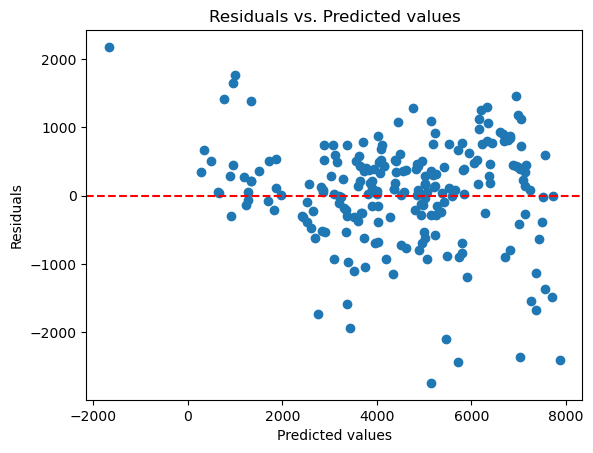

In [171]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_scaled

plt.scatter(y_pred_scaled, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted values')
plt.show()




### Residual normality

D:\Users\SHARAVANAKUMAR_B_S\Downloads\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


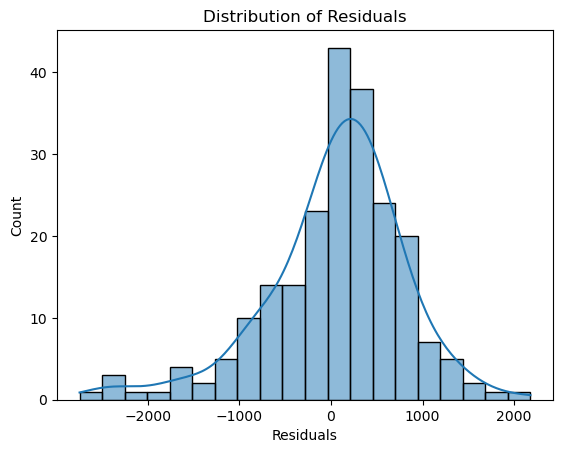

In [174]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


### QUESTION 5

Based on the final model, which are the top 3 features contributing significantly towards explaining the demand of the shared bikes?

In [177]:
features = X_train.columns
coefficients = linearModel.coef_

In [179]:
coef_df = pd.DataFrame({'Features': features, 'Coefficient': coefficients})
coef_df

,Features,Coefficient
0,yr,1999.166964
1,holiday,-116.050807
2,workingday,142.067073
3,temp,3063.075760
4,atemp,896.508443
5,hum,-1490.914454
6,windspeed,-1568.132355
7,season_Spring,-787.483921
8,season_Summer,99.839360
9,season_Winter,768.727523


In [181]:
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df

,Features,Coefficient,Absolute Coefficient
0,yr,1999.166964,1999.166964
1,holiday,-116.050807,116.050807
2,workingday,142.067073,142.067073
3,temp,3063.075760,3063.075760
4,atemp,896.508443,896.508443
5,hum,-1490.914454,1490.914454
6,windspeed,-1568.132355,1568.132355
7,season_Spring,-787.483921,787.483921
8,season_Summer,99.839360,99.839360
9,season_Winter,768.727523,768.727523


In [183]:
top_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head(3)

In [185]:
top_features

,Features,Coefficient,Absolute Coefficient
3,temp,3063.075760,3063.075760
10,weathersit_Light_Snow_Rain,-2347.746688,2347.746688
0,yr,1999.166964,1999.166964


In [187]:
top_5_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head()

In [189]:
top_5_features

,Features,Coefficient,Absolute Coefficient
3,temp,3063.075760,3063.075760
10,weathersit_Light_Snow_Rain,-2347.746688,2347.746688
0,yr,1999.166964,1999.166964
6,windspeed,-1568.132355,1568.132355
5,hum,-1490.914454,1490.914454
